In [7]:
import geopandas as gp
import copy

#森林のGEOデータ(geopandasで読めればOK。単位は緯度経度。sharpファイルかgeojsonファイル)
forest_filename = 'A13-15_14_GML/a001140020160207.shp'
#行政地区のGEOデータ(geopandasで読めればOK。単位は緯度経度。sharpファイルかgeojsonファイル)
cities_filename = 'N03-180101_14_GML/N03-18_14_180101.geojson'
#行政地区のキーと名前を取得する
def get_key(city) :
    return city['N03_007']
def get_name(city) :
    return city['N03_001'].fillna('')+city['N03_002'].fillna('')+city['N03_003'].fillna('')+city['N03_004'].fillna('')

#読み込み
forest_df = gp.read_file(forest_filename)
cities_df = gp.read_file(cities_filename)

In [8]:
#idで面積を集計する
def sum_area(geometrys):
    areas = {}
    for idx in geometrys.index:
        key = get_key(geometrys)[idx]
        if key in areas:
            areas[key] += geometrys.area[idx]
        else :
            areas[key] = geometrys.area[idx]
    return areas

#同じidのデータの比率を出す
def check_rate(inner, outer):
    rates = {}
    for k,v in sorted(outer.items()):
        rates[k] = inner[k]/outer[k]*100
    return rates

In [9]:
#森林データをマルチポリゴンに変換
forest_polygon = forest_df['geometry'].unary_union
#積集合で各行政地区の森林を抽出
cities_forest_df = copy.deepcopy(cities_df)
cities_forest_df['geometry'] = cities_forest_df['geometry'].intersection(forest_polygon)

In [10]:
#行政地区が複数あるため、それぞれのポリゴン単位で面積を集計
forest_area = {}
all_area = {}
forest_area = sum_area(cities_forest_df)
all_area = sum_area(cities_df)

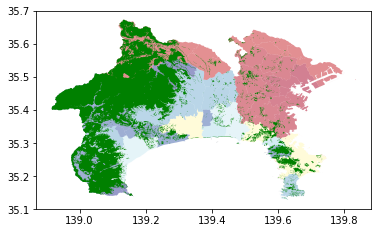

In [11]:
#表示確認
#各データを重ねて表示
base = cities_df.plot(cmap='RdYlBu', alpha=0.5)
forest_df.plot(ax=base, color='green')

In [13]:
#行政地区ごとの森林比率を算出
forest_rates = check_rate(forest_area, all_area)
#行政地区の名前辞書作成
area_name = dict(zip(get_key(cities_df),get_name(cities_df)))

#CSV表示
print ('id,name,forest_rate,all(),forest')
for k in forest_rates:
    print ('%s,%s,%f,%f,%f' % (k,area_name[k],forest_rates[k],all_area[k],forest_area[k]))

id,name,forest_rate,all,forest
14101,神奈川県横浜市鶴見区,0.485204,0.003301,0.000016
14102,神奈川県横浜市神奈川区,1.726153,0.002357,0.000041
14103,神奈川県横浜市西区,0.000000,0.000698,0.000000
14104,神奈川県横浜市中区,1.286352,0.002112,0.000027
14105,神奈川県横浜市南区,0.076987,0.001256,0.000001
14106,神奈川県横浜市保土ケ谷区,5.396286,0.002178,0.000118
14107,神奈川県横浜市磯子区,7.843012,0.001890,0.000148
14108,神奈川県横浜市金沢区,8.304226,0.003070,0.000255
14109,神奈川県横浜市港北区,2.306504,0.003121,0.000072
14110,神奈川県横浜市戸塚区,8.273323,0.003552,0.000294
14111,神奈川県横浜市港南区,1.842399,0.001975,0.000036
14112,神奈川県横浜市旭区,8.499711,0.003250,0.000276
14113,神奈川県横浜市緑区,13.905616,0.002535,0.000352
14114,神奈川県横浜市瀬谷区,4.069226,0.001705,0.000069
14115,神奈川県横浜市栄区,13.531300,0.001837,0.000249
14116,神奈川県横浜市泉区,4.127961,0.002340,0.000097
14117,神奈川県横浜市青葉区,6.009950,0.003501,0.000210
14118,神奈川県横浜市都筑区,2.695649,0.002770,0.000075
14131,神奈川県川崎市川崎区,0.000000,0.003928,0.000000
14132,神奈川県川崎市幸区,0.000000,0.000995,0.000000
14133,神奈川県川崎市中原区,0.059384,0.001466,0.000001
14134,神奈川県川崎市高津区,1.212136,0.001627,0.000020
1413